## Benford’s Law Distribution

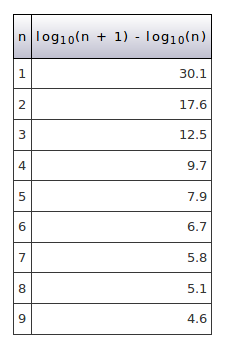

In [1]:
# IMPORTING LIBRARIES
import matplotlib.pyplot as plt
import rasterio
from LNC import get_dln, f_lnd, fdln

In [2]:
# Load DEM
dem = rasterio.open('madeenah.tif')

# Load aspect (slope)
asp = rasterio.open('madeenah_aspect.tif')

In [3]:
print("\nDEM\n")
print(dem.profile)
print("\nASPECT\n")
print(asp.profile)


DEM

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32767.0, 'width': 3601, 'height': 3601, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002777777777777778, 0.0, 38.99986111111111,
       0.0, -0.0002777777777777778, 25.00013888888889), 'tiled': False, 'interleave': 'band'}

ASPECT

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 3601, 'height': 3601, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002777777777777778, 0.0, 38.99986111111111,
       0.0, -0.0002777777777777778, 25.00013888888889), 'tiled': False, 'interleave': 'band'}


In [4]:
# reading the first band (not from zero!)
band1 = dem.read(1)

In [5]:
# Preview of the 
band1

array([[ 443,  443,  442, ..., 1052, 1049, 1039],
       [ 442,  443,  443, ..., 1064, 1055, 1044],
       [ 443,  443,  443, ..., 1063, 1052, 1042],
       ...,
       [ 549,  558,  573, ...,  960,  959,  958],
       [ 566,  574,  589, ...,  960,  959,  958],
       [ 571,  584,  611, ...,  959,  958,  959]], dtype=int16)

In [6]:
band1 = band1.flatten()

In [7]:
f1 = get_dln(band1)

In [8]:
n = sum(f1)
ff1 = []
for i in range(len(f1)):
    ff1.append(100*f1[i]/n)


In [9]:
f_lnd(f1)

digit | frequency
    1 |  18.41
    2 |   0.01
    3 |   0.20
    4 |   2.37
    5 |   8.29
    6 |  16.30
    7 |  21.68
    8 |  18.07
    9 |  14.67


In [10]:
# reading the first band (not from zero!)
band2 = asp.read(1) # 2d array

In [11]:
band2 = band2.flatten()

In [12]:
f2 = get_dln(band2)

In [13]:
n2 = sum(f2)
ff2 = []
for i in range(len(f2)):
    ff2.append(100*f2[i]/n2)


In [14]:
f_lnd(f2)

digit | frequency
    1 |  31.77
    2 |  30.57
    3 |  19.56
    4 |   3.60
    5 |   2.98
    6 |   2.85
    7 |   2.93
    8 |   2.33
    9 |   3.40


In [15]:
X = list(range(1,  10))

B = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

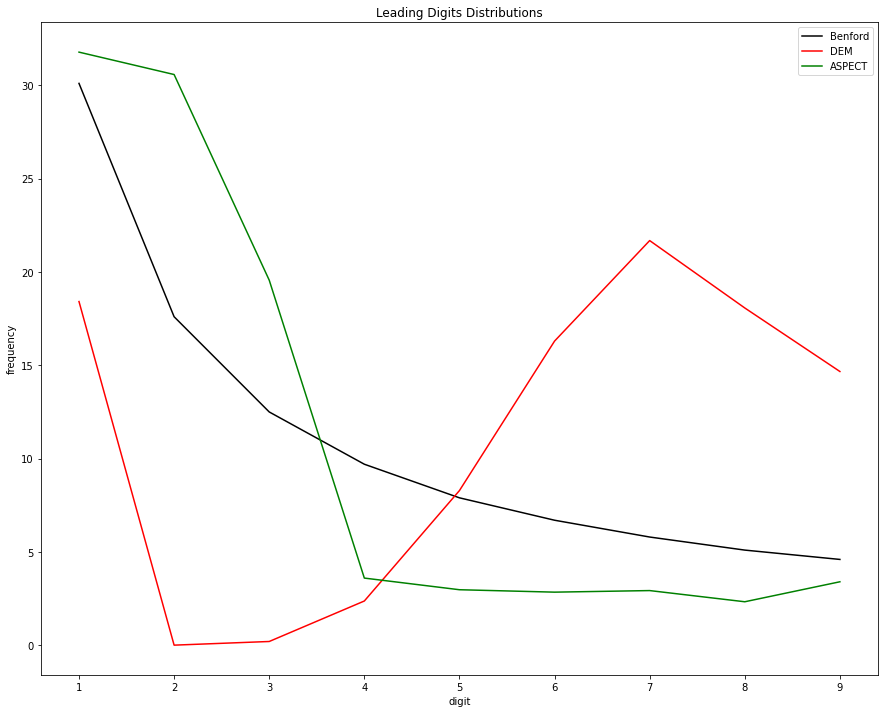

In [20]:
# Plotting both the curves simultaneously
plt.figure(figsize=(15, 12))
plt.plot(X, B, color='k', label='Benford')
plt.plot(X, ff1, color='r', label='DEM')
plt.plot(X, ff2, color='g', label='ASPECT')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("digit")
plt.ylabel("frequency")
plt.title("Leading Digits Distributions")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()